In [1]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# Directory where the TensorBoard logs are stored
log_dir = os.getcwd()

run_folders = [os.path.join(log_dir, run) for run in os.listdir(log_dir) if os.path.isdir(os.path.join(log_dir, run))]

In [3]:
for f in run_folders:
    if ('pg_cheetah_baseline_HalfCheetah-v4_18-08' in f):
        cheetah_baseline = f
    elif('cheetah_baseline_bgs_2' in f):
        cheetah_bgs = f
    elif('cheetah_baseline_blr_dot001' in f):
        cheetah_blr = f
    elif('q2_pg_cheetah_baseline_na' in f):
        cheetah_na = f
    else:
        cheetah = f

## Using a Neural Network Baseline
### Halfcheetah
- curve for the baseline loss

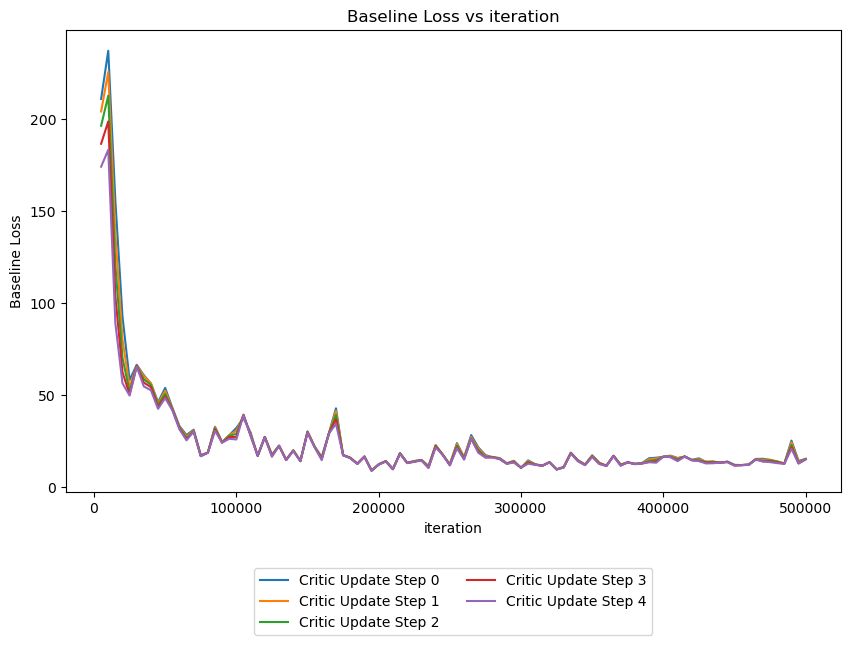

In [5]:
plt.figure(figsize=(10, 6))

event_acc = EventAccumulator(cheetah_baseline)
event_acc.Reload()

    # Extracting values to plot

steps = np.array([int(s.value) for s in event_acc.Scalars('Train_EnvstepsSoFar')])
loss0 = np.array([s.value for s in event_acc.Scalars('critic_update_step0-_Baseline_Loss')])
loss1 = np.array([s.value for s in event_acc.Scalars('critic_update_step1-_Baseline_Loss')])
loss2 = np.array([s.value for s in event_acc.Scalars('critic_update_step2-_Baseline_Loss')])
loss3 = np.array([s.value for s in event_acc.Scalars('critic_update_step3-_Baseline_Loss')])
loss4 = np.array([s.value for s in event_acc.Scalars('critic_update_step4-_Baseline_Loss')])
    # Plotting
plt.plot(steps, loss0, label='Critic Update Step 0')
plt.plot(steps, loss1, label='Critic Update Step 1')
plt.plot(steps, loss2, label='Critic Update Step 2')
plt.plot(steps, loss3, label='Critic Update Step 3')
plt.plot(steps, loss4, label='Critic Update Step 4')


# Adding legends, labels and title
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.xlabel('iteration')
plt.ylabel('Baseline Loss')
plt.title('Baseline Loss vs iteration')

# Show plot
plt.show()

- curve for the eval return

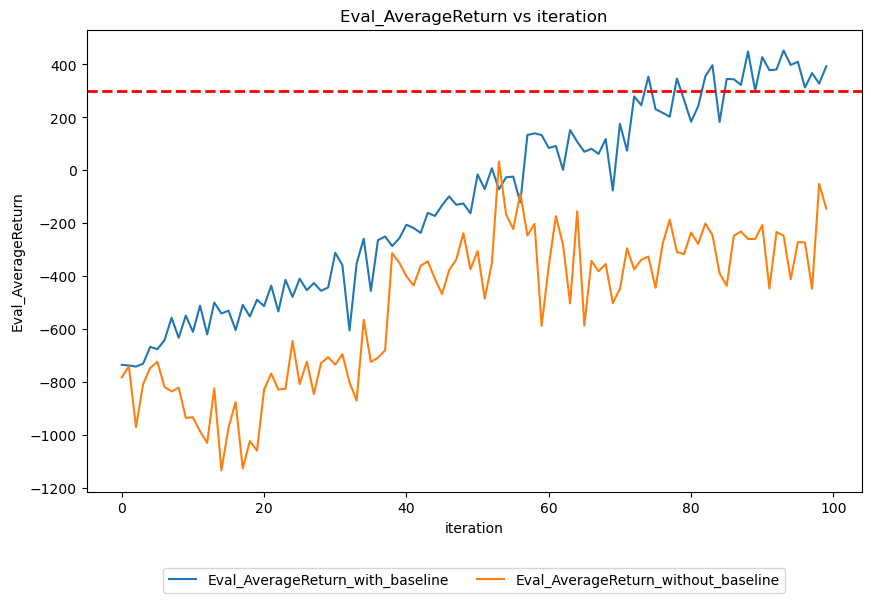

In [26]:
plt.figure(figsize=(10, 6))
event_acc = EventAccumulator(cheetah)
event_acc_baseline = EventAccumulator(cheetah_baseline)
event_acc.Reload()
event_acc_baseline.Reload()
    # Extracting values to plot

steps = np.array([int(s.step) for s in event_acc.Scalars('Train_EnvstepsSoFar')])
return_baseline = np.array([s.value for s in event_acc_baseline.Scalars('Eval_AverageReturn')])
return_without_baseline = np.array([s.value for s in event_acc.Scalars('Eval_AverageReturn')])
plt.plot(steps, return_baseline, label='Eval_AverageReturn_with_baseline')
plt.plot(steps, return_without_baseline, label='Eval_AverageReturn_without_baseline')

# Adding legends, labels and title
plt.axhline(y=300,color='r', linestyle='--', linewidth=2)  
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.xlabel('iteration')
plt.ylabel('Eval_AverageReturn')
plt.title('Eval_AverageReturn vs iteration')

# Show plot
plt.show()

- decrease baseline gradient steps and baseline learning rate

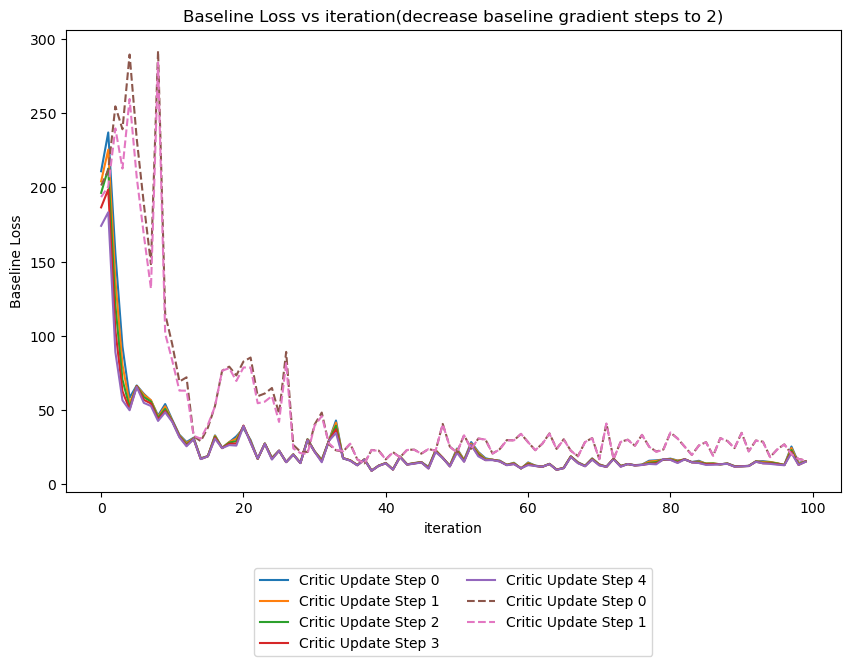

In [36]:
plt.figure(figsize=(10, 6))

event_acc = EventAccumulator(cheetah_baseline)
event_acc.Reload()

    # Extracting values to plot

steps = np.array([int(s.step) for s in event_acc.Scalars('Train_EnvstepsSoFar')])
loss0 = np.array([s.value for s in event_acc.Scalars('critic_update_step0-_Baseline_Loss')])
loss1 = np.array([s.value for s in event_acc.Scalars('critic_update_step1-_Baseline_Loss')])
loss2 = np.array([s.value for s in event_acc.Scalars('critic_update_step2-_Baseline_Loss')])
loss3 = np.array([s.value for s in event_acc.Scalars('critic_update_step3-_Baseline_Loss')])
loss4 = np.array([s.value for s in event_acc.Scalars('critic_update_step4-_Baseline_Loss')])
    # Plotting
plt.plot(steps, loss0, label='Critic Update Step 0')
plt.plot(steps, loss1, label='Critic Update Step 1')
plt.plot(steps, loss2, label='Critic Update Step 2')
plt.plot(steps, loss3, label='Critic Update Step 3')
plt.plot(steps, loss4, label='Critic Update Step 4')


event_acc = EventAccumulator(cheetah_bgs)
event_acc.Reload()

    # Extracting values to plot

steps = np.array([int(s.step) for s in event_acc.Scalars('Train_EnvstepsSoFar')])
loss0 = np.array([s.value for s in event_acc.Scalars('critic_update_step0-_Baseline_Loss')])
loss1 = np.array([s.value for s in event_acc.Scalars('critic_update_step1-_Baseline_Loss')])
# loss2 = np.array([s.value for s in event_acc.Scalars('critic_update_step2-_Baseline_Loss')])
# loss3 = np.array([s.value for s in event_acc.Scalars('critic_update_step3-_Baseline_Loss')])
# loss4 = np.array([s.value for s in event_acc.Scalars('critic_update_step4-_Baseline_Loss')])
    # Plotting
plt.plot(steps, loss0, label='Critic Update Step 0',linestyle='--')
plt.plot(steps, loss1, label='Critic Update Step 1',linestyle='--')
# plt.plot(steps, loss2, label='Critic Update Step 2')
# plt.plot(steps, loss3, label='Critic Update Step 3')
# plt.plot(steps, loss4, label='Critic Update Step 4')




# Adding legends, labels and title
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.xlabel('iteration')
plt.ylabel('Baseline Loss')
plt.title('Baseline Loss vs iteration(decrease baseline gradient steps to 2)')

# Show plot
plt.show()

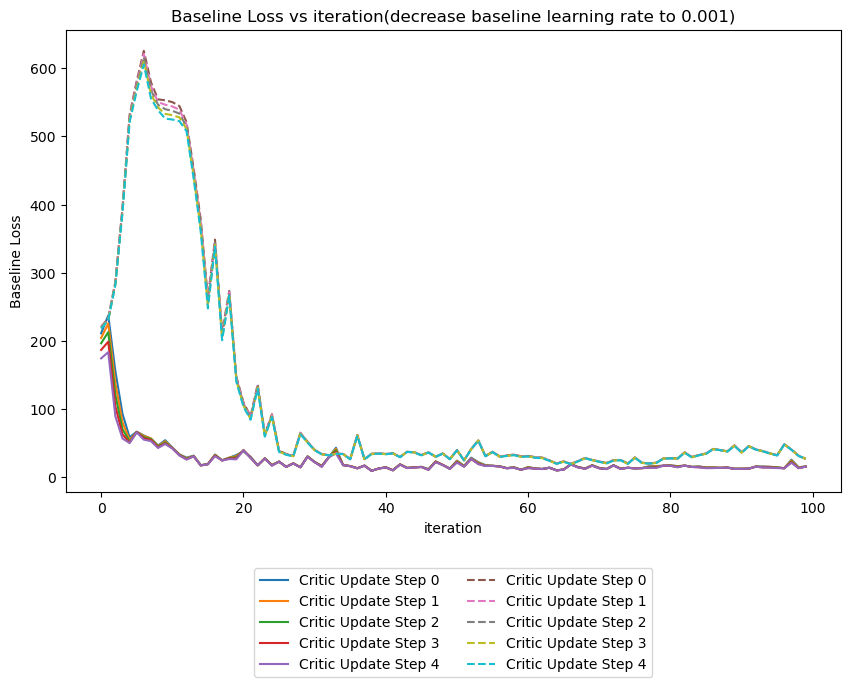

In [37]:
plt.figure(figsize=(10, 6))

event_acc = EventAccumulator(cheetah_baseline)
event_acc.Reload()

    # Extracting values to plot

steps = np.array([int(s.step) for s in event_acc.Scalars('Train_EnvstepsSoFar')])
loss0 = np.array([s.value for s in event_acc.Scalars('critic_update_step0-_Baseline_Loss')])
loss1 = np.array([s.value for s in event_acc.Scalars('critic_update_step1-_Baseline_Loss')])
loss2 = np.array([s.value for s in event_acc.Scalars('critic_update_step2-_Baseline_Loss')])
loss3 = np.array([s.value for s in event_acc.Scalars('critic_update_step3-_Baseline_Loss')])
loss4 = np.array([s.value for s in event_acc.Scalars('critic_update_step4-_Baseline_Loss')])
    # Plotting
plt.plot(steps, loss0, label='Critic Update Step 0')
plt.plot(steps, loss1, label='Critic Update Step 1')
plt.plot(steps, loss2, label='Critic Update Step 2')
plt.plot(steps, loss3, label='Critic Update Step 3')
plt.plot(steps, loss4, label='Critic Update Step 4')


event_acc = EventAccumulator(cheetah_blr)
event_acc.Reload()

    # Extracting values to plot

steps = np.array([int(s.step) for s in event_acc.Scalars('Train_EnvstepsSoFar')])
loss0 = np.array([s.value for s in event_acc.Scalars('critic_update_step0-_Baseline_Loss')])
loss1 = np.array([s.value for s in event_acc.Scalars('critic_update_step1-_Baseline_Loss')])
loss2 = np.array([s.value for s in event_acc.Scalars('critic_update_step2-_Baseline_Loss')])
loss3 = np.array([s.value for s in event_acc.Scalars('critic_update_step3-_Baseline_Loss')])
loss4 = np.array([s.value for s in event_acc.Scalars('critic_update_step4-_Baseline_Loss')])
    # Plotting
plt.plot(steps, loss0, label='Critic Update Step 0',linestyle='--')
plt.plot(steps, loss1, label='Critic Update Step 1',linestyle='--')
plt.plot(steps, loss2, label='Critic Update Step 2',linestyle='--')
plt.plot(steps, loss3, label='Critic Update Step 3',linestyle='--')
plt.plot(steps, loss4, label='Critic Update Step 4',linestyle='--')




# Adding legends, labels and title
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.xlabel('iteration')
plt.ylabel('Baseline Loss')
plt.title('Baseline Loss vs iteration(decrease baseline learning rate to 0.001)')

# Show plot
plt.show()

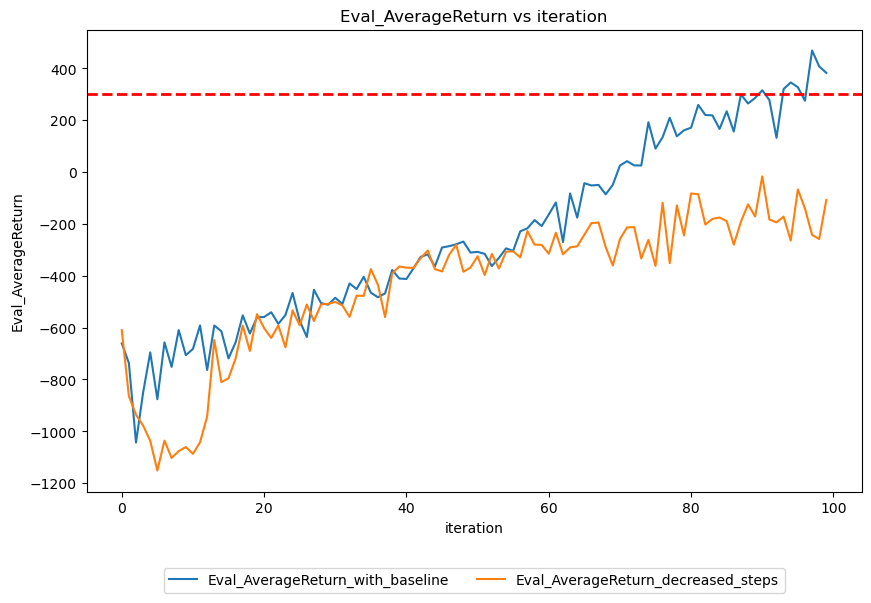

In [43]:
plt.figure(figsize=(10, 6))
event_acc_bgs = EventAccumulator(cheetah_bgs)
event_acc_baseline = EventAccumulator(cheetah_baseline)
event_acc_bgs.Reload()
event_acc_baseline.Reload()
    # Extracting values to plot

steps = np.array([int(s.step) for s in event_acc_baseline.Scalars('Train_EnvstepsSoFar')])
return_baseline = np.array([s.value for s in event_acc_baseline.Scalars('Eval_AverageReturn')])
return_with_decreased_steps = np.array([s.value for s in event_acc_bgs.Scalars('Eval_AverageReturn')])
plt.plot(steps, return_baseline, label='Eval_AverageReturn_with_baseline')
plt.plot(steps, return_with_decreased_steps, label='Eval_AverageReturn_decreased_steps')

# Adding legends, labels and title
plt.axhline(y=300,color='r', linestyle='--', linewidth=2)  
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.xlabel('iteration')
plt.ylabel('Eval_AverageReturn')
plt.title('Eval_AverageReturn vs iteration')

# Show plot
plt.show()

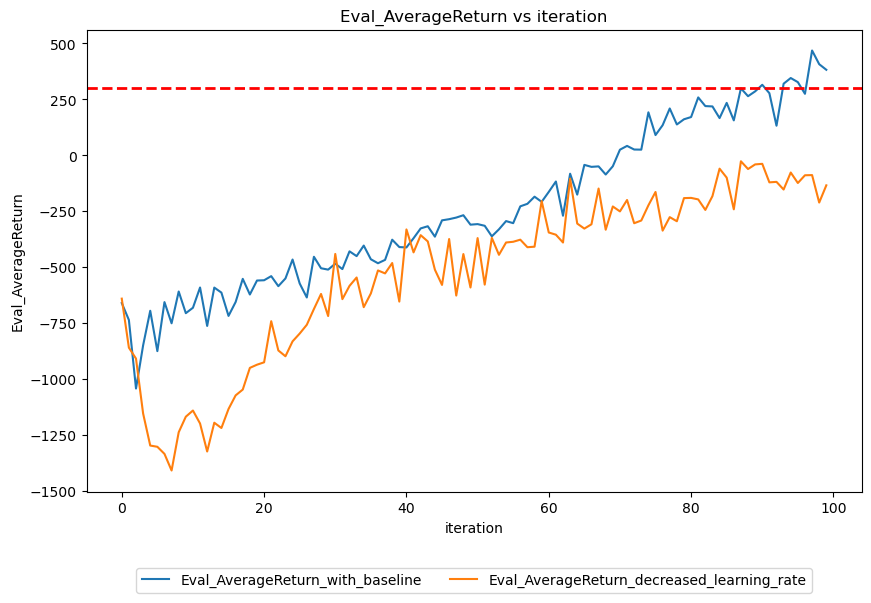

In [54]:
plt.figure(figsize=(10, 6))
event_acc_blr = EventAccumulator(cheetah_blr)
event_acc_baseline = EventAccumulator(cheetah_baseline)
event_acc_blr.Reload()
event_acc_baseline.Reload()
    # Extracting values to plot

steps = np.array([int(s.step) for s in event_acc_baseline.Scalars('Train_EnvstepsSoFar')])
return_baseline = np.array([s.value for s in event_acc_baseline.Scalars('Eval_AverageReturn')])
return_with_decreased_learning_rate = np.array([s.value for s in event_acc_blr.Scalars('Eval_AverageReturn')])
plt.plot(steps, return_baseline, label='Eval_AverageReturn_with_baseline')
plt.plot(steps, return_with_decreased_learning_rate, label='Eval_AverageReturn_decreased_learning_rate')

# Adding legends, labels and title
plt.axhline(y=300,color='r', linestyle='--', linewidth=2)  
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.xlabel('iteration')
plt.ylabel('Eval_AverageReturn')
plt.title('Eval_AverageReturn vs iteration')

# Show plot
plt.show()

- bring normailize advantages

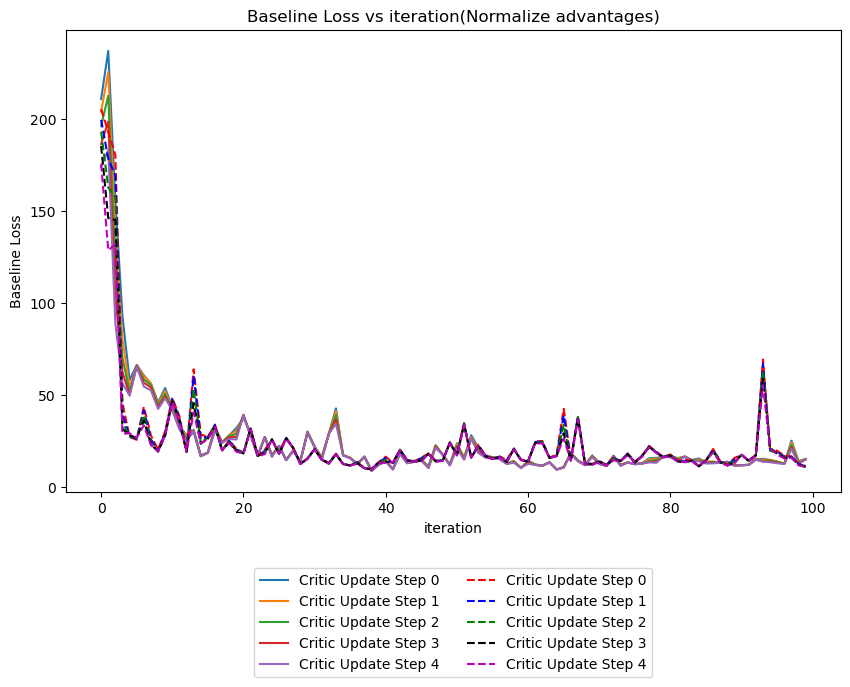

In [52]:
plt.figure(figsize=(10, 6))

event_acc = EventAccumulator(cheetah_baseline)
event_acc.Reload()

    # Extracting values to plot

steps = np.array([int(s.step) for s in event_acc.Scalars('Train_EnvstepsSoFar')])
loss0 = np.array([s.value for s in event_acc.Scalars('critic_update_step0-_Baseline_Loss')])
loss1 = np.array([s.value for s in event_acc.Scalars('critic_update_step1-_Baseline_Loss')])
loss2 = np.array([s.value for s in event_acc.Scalars('critic_update_step2-_Baseline_Loss')])
loss3 = np.array([s.value for s in event_acc.Scalars('critic_update_step3-_Baseline_Loss')])
loss4 = np.array([s.value for s in event_acc.Scalars('critic_update_step4-_Baseline_Loss')])
    # Plotting
plt.plot(steps, loss0, label='Critic Update Step 0')
plt.plot(steps, loss1, label='Critic Update Step 1')
plt.plot(steps, loss2, label='Critic Update Step 2')
plt.plot(steps, loss3, label='Critic Update Step 3')
plt.plot(steps, loss4, label='Critic Update Step 4')


event_acc = EventAccumulator(cheetah_na)
event_acc.Reload()

    # Extracting values to plot

steps = np.array([int(s.step) for s in event_acc.Scalars('Train_EnvstepsSoFar')])
loss0 = np.array([s.value for s in event_acc.Scalars('critic_update_step0-_Baseline_Loss')])
loss1 = np.array([s.value for s in event_acc.Scalars('critic_update_step1-_Baseline_Loss')])
loss2 = np.array([s.value for s in event_acc.Scalars('critic_update_step2-_Baseline_Loss')])
loss3 = np.array([s.value for s in event_acc.Scalars('critic_update_step3-_Baseline_Loss')])
loss4 = np.array([s.value for s in event_acc.Scalars('critic_update_step4-_Baseline_Loss')])
    # Plotting
plt.plot(steps, loss0, label='Critic Update Step 0',linestyle='--',color='r')
plt.plot(steps, loss1, label='Critic Update Step 1',linestyle='--',color='b')
plt.plot(steps, loss2, label='Critic Update Step 2',linestyle='--',color='g')
plt.plot(steps, loss3, label='Critic Update Step 3',linestyle='--',color='k')
plt.plot(steps, loss4, label='Critic Update Step 4',linestyle='--',color='m')




# Adding legends, labels and title
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.xlabel('iteration')
plt.ylabel('Baseline Loss')
plt.title('Baseline Loss vs iteration(Normalize advantages)')

# Show plot
plt.show()

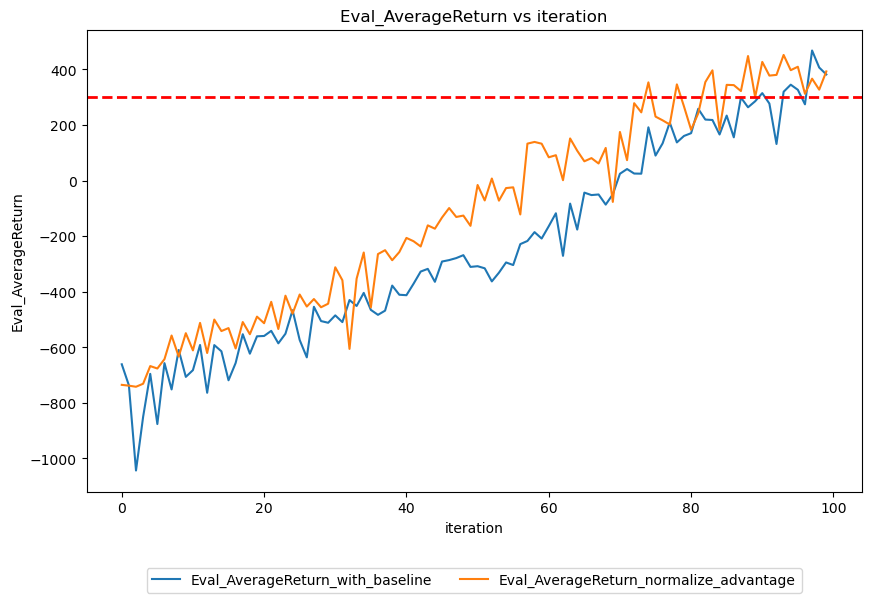

In [55]:
plt.figure(figsize=(10, 6))
event_acc_na = EventAccumulator(cheetah_na)
event_acc_baseline = EventAccumulator(cheetah_baseline)
event_acc_na.Reload()
event_acc_baseline.Reload()
    # Extracting values to plot

steps = np.array([int(s.step) for s in event_acc_baseline.Scalars('Train_EnvstepsSoFar')])
return_baseline = np.array([s.value for s in event_acc_baseline.Scalars('Eval_AverageReturn')])
return_with_normalize_advantage = np.array([s.value for s in event_acc_na.Scalars('Eval_AverageReturn')])
plt.plot(steps, return_baseline, label='Eval_AverageReturn_with_baseline')
plt.plot(steps, return_with_normalize_advantage, label='Eval_AverageReturn_normalize_advantage')

# Adding legends, labels and title
plt.axhline(y=300,color='r', linestyle='--', linewidth=2)  
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.xlabel('iteration')
plt.ylabel('Eval_AverageReturn')
plt.title('Eval_AverageReturn vs iteration')

# Show plot
plt.show()